In [45]:
import pandas as pd

at = pd.read_csv('Articles.csv',encoding="ISO-8859-1")
at.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


We first create two subgroups: one contains all docs related to business and the other included all docs related to sports. It is convenient for us to compute the stastical summary and do the data visualization later.

In [53]:
bus = at[at['NewsType']=='business']
bus

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business
5,New York: Oil prices tumbled Tuesday to fresh ...,1/7/2015,oil hits new 5.5 year lows as saudis defend,business
6,KARACHI: Strong bulls on Friday pulled the ben...,1/9/2015,bullish kse jumps over 33000 psychological bar...,business
7,"Singapore: Oil fell further in Asia Monday, wi...",1/12/2015,oil falls further in asian trad,business
8,KARACHI: Wholesale market rates for sugar drop...,1/13/2015,sugar prices drop to rs 49.80 in sind,business
9,SYDNEY: Oil prices fell 1 percent on Wednesday...,1/14/2015,oil extends losses as world bank cuts growth for,business


In [56]:
sport = at[at['NewsType']=='sports']
sport

,Article,Date,Heading,NewsType
1021,strong>LAHORE: Left arm fast bowler Mohammad A...,1/1/2016,Amir returns to Pakistan squad after 5 year b,sports
1022,strong>SYDNEY: Australia look set to field two...,1/1/2016,Australia set to test twin spin attack against...,sports
1023,strong>SYDNEY: After picking up pretty much ev...,1/2/2016,Australia skipper Smith plots return to test s...,sports
1024,WELLINGTON: New Zealand captain Brendon McCull...,1/3/2016,McCullum says Amir should get benefit of doub,sports
1025,CAPE TOWN: Ben Stokes and Jonny Bairstow tore ...,1/3/2016,England declare on 629 6 on record breaking day,sports
1026,CAPE TOWN: Ben Stokes scored the second fastes...,1/3/2016,Stokes batters South Africa in blistering double,sports
1027,SYDNEY: Australia´s spinners Nathan Lyon and S...,1/3/2016,Australias spinners peg West Indies back in Sy...,sports
1028,CAPE TOWN: Captain Hashim Amla scored an unbea...,1/4/2016,Amla makes century De Villiers falls for 88,sports
1029,SYDNEY: Carlos Brathwaite shone briefly for We...,1/4/2016,Brathwaite cameo a bright spot in Sydney washou,sports
1030,strong>LAHORE: Pakistans fast bowler Mohamamd...,1/4/2016,Amir hopes to win trust with his perfor,sports


In [46]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 4 columns):
Article     2692 non-null object
Date        2692 non-null object
Heading     2692 non-null object
NewsType    2692 non-null object
dtypes: object(4)
memory usage: 84.2+ KB


In [70]:
pd.unique(at["NewsType"][:])
at['Article'].count()
at['Article'][0]

'KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n'

In [73]:
import nltk
import re
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
summary_text = []
for index in range(0,at['Article'].count()):
    voc = re.sub('[^a-zA-Z]+', ' ', at["Article"][index]).lower()
# stemming, we tried it but the results seem to be unreliable
#     voc_list = voc.split(' ')
#     i = 0
#     for word in voc_list:
#         voc_list[i] = porter_stemmer.stem(word) 
#         i+=1 
#     voc = ' '.join(str(x) for x in voc_list)
    
    for word in stopwords.words('english'):# iterate over word_list
        voc = re.sub('\s{0}\s'.format(word), ' ', voc) 
    summary_text.append(voc)

summary_text


['karachi sindh government decided bring public transport fares per cent due massive reduction petroleum product prices federal government geo news reported sources said reduction fares applicable public transport rickshaw taxi means traveling meanwhile karachi transport ittehad kti refused abide government decision kti president irshad bukhari said commuters charged lowest fares karachi compare parts country adding pc vehicles run compressed natural gas cng bukhari said karachi transporters cut fares decrease cng prices made ']

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() # an object capable of counting words in a document!

bag_words = count_vect.fit_transform(summary_text)

In [51]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(2692, 25402)
  (0, 13081)	1
  (0, 5506)	1
  (0, 5219)	1
  (0, 23314)	1
  (0, 4126)	2
  (0, 8837)	1
  (0, 14628)	1
  (0, 4426)	1
  (0, 18963)	1
  (0, 24199)	1
  (0, 16005)	1
  (0, 253)	1
  (0, 4923)	1
  (0, 15883)	1
  (0, 4348)	1
  (0, 12960)	1
  (0, 3699)	1
  (0, 4336)	1
  (0, 3027)	2
  (0, 11245)	1
  (0, 16860)	1
  (0, 5485)	1
  (0, 50)	1
  (0, 18022)	1
  (0, 12162)	2
  :	:
  (0, 22553)	1
  (0, 18620)	1
  (0, 1092)	1
  (0, 19084)	3
  (0, 20662)	1
  (0, 18301)	1
  (0, 14812)	1
  (0, 8936)	1
  (0, 7925)	1
  (0, 16907)	2
  (0, 17013)	1
  (0, 16223)	1
  (0, 17949)	2
  (0, 13466)	1
  (0, 6596)	1
  (0, 3539)	1
  (0, 16096)	1
  (0, 7803)	4
  (0, 23311)	3
  (0, 17225)	2
  (0, 2901)	1
  (0, 5477)	1
  (0, 9200)	3
  (0, 20235)	1
  (0, 11772)	4


In [52]:
print(len(count_vect.vocabulary_))
print(count_vect.vocabulary_)

25402
{'karachi': 11772, 'sindh': 20235, 'government': 9200, 'decided': 5477, 'bring': 2901, 'public': 17225, 'transport': 23311, 'fares': 7803, 'per': 16096, 'cent': 3539, 'due': 6596, 'massive': 13466, 'reduction': 17949, 'petroleum': 16223, 'product': 17013, 'prices': 16907, 'federal': 7925, 'geo': 8936, 'news': 14812, 'reported': 18301, 'sources': 20662, 'said': 19084, 'applicable': 1092, 'rickshaw': 18620, 'taxi': 22553, 'means': 13624, 'traveling': 23329, 'meanwhile': 13627, 'ittehad': 11313, 'kti': 12162, 'refused': 18022, 'abide': 50, 'decision': 5485, 'president': 16860, 'irshad': 11245, 'bukhari': 3027, 'commuters': 4336, 'charged': 3699, 'lowest': 12960, 'compare': 4348, 'parts': 15883, 'country': 4923, 'adding': 253, 'pc': 16005, 'vehicles': 24199, 'run': 18963, 'compressed': 4426, 'natural': 14628, 'gas': 8837, 'cng': 4126, 'transporters': 23314, 'cut': 5219, 'decrease': 5506, 'made': 13081, 'hong': 10144, 'kong': 12113, 'asian': 1328, 'markets': 13389, 'started': 21058, '

In [57]:
pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

In [59]:
df.sum().sort_values()[-10:]

also        1945
two         1962
oil         1977
world       2103
strong      2285
first       2391
year        2941
pakistan    3229
percent     3318
said        6043
dtype: int64

# TF-IDF Conversion


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() # an object capable of counting words in a document!

tfidf_mat = tfidf_vect.fit_transform(summary_text) # that's it! its converted!!

In [61]:
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df.max().sort_values()[-10:]

broadband    0.717746
edhi         0.718505
dates        0.750866
cotton       0.767944
trillion     0.770805
engines      0.777106
keys         0.781720
br           0.783921
poultry      0.790130
polo         0.794065
dtype: float64

# Data Visualization

In [74]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

(0.7, 0.8)

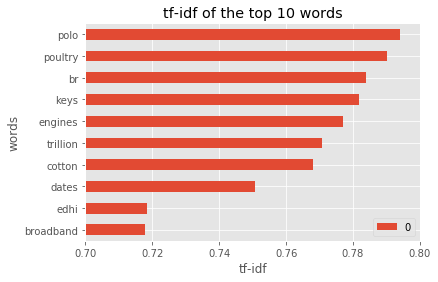

In [80]:
plt.style.use('ggplot')
plot1 = pd.DataFrame(df.max().sort_values()[-10:])
# plot1.index = plot1.country
ax = plot1.plot(kind='barh')
plt.title('tf-idf of the top 10 words')
plt.xlabel('tf-idf')
plt.ylabel('words')
axes = plt.gca()
axes.set_xlim([0.7,0.8])